In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.constants import speed_of_light

from owcsimpy.geoobjects.models.roomcube_py import RoomCube_py as Room
from owcsimpy.geoobjects.models.humancubes_py import HumanCubes_py as Human
from owcsimpy.geoobjects.models.pointsource_py import PointSource_py as PointSource
from owcsimpy.geoobjects.models.baredetector_py import BareDetector_py as BareDetector
from owcsimpy.geoutils.draw import draw
from owcsimpy.cir.freqdomaincir import FreqDomainCIR
from owcsimpy.cir.timedomaincir import TimeDomainCIR

<IPython.core.display.Javascript object>


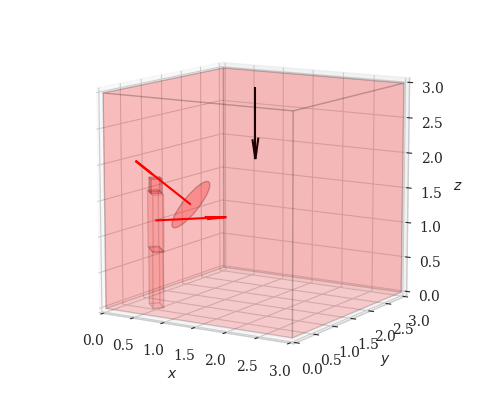

In [3]:
timeSampling=1e-9

# Room
rho_keys = ['b','t','s','n','e','w']
rho_vals = [0.2,0.5,0.5,0.5,0.5,0.5]
reflectivities = {rho_keys[i]:rho_vals[i] for i in range(6)}

room = Room(dimensions=[3,3,3],identity=1,reflectivities=reflectivities)

# Person
rho_keys = ['hair','face','shirt']
rho_vals = [0.6,0.5,0.3]
reflectivities = {rho_keys[i]:rho_vals[i] for i in range(len(rho_keys))}

persons = []
persons.append(Human(
    direction=np.deg2rad(45),
    loc=np.array([0.5,0.5]),
    reflectivities=reflectivities))

# LED
led = PointSource(np.pi,0,np.array([1.5,1.5,3]))

# PD
polar = np.deg2rad(50)
azimuth = persons[0].listPlanes[1]._RectPlane_py__normalVect.spherical[2]+np.pi
loc = (persons[0].ctrPoint
       +0.5*persons[0].listPlanes[1].normalVect
       +np.array([0,0,0.2]))
pd = BareDetector(polar,azimuth,loc,area=1e-4)

fig,ax = draw(xlim=[0,3],ylim=[0,3],zlim=[0,3],
              figsize=(5,4),azim=-58,elev=11)

fig,ax = draw(figure=fig,axes=ax,models3d=[room],lengths=1e-5)
fig,ax = draw(figure=fig,axes=ax,models3d=[persons[0]],lengths=0.5)
fig,ax = draw(figure=fig,axes=ax,vectors=led,colors='black')
fig,ax = draw(figure=fig,axes=ax,circles=pd,scales=5e3)

In [4]:
%%time

tdcir2 = TimeDomainCIR(timeSampling=0.5e-9)
ht_los_td2, ht_diff_td2 = tdcir2.calc(led,pd,persons,room,
                                      numReflections=3,partitionDist=speed_of_light*0.5e-9)

# Transform to freq-domain
Hf_los_td2, Hf_diff_td2 = tdcir2.transform()

CPU times: user 25.9 s, sys: 38.6 ms, total: 26 s
Wall time: 25.9 s


In [5]:
print(ht_diff_td2)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.55959848e-08
 4.92097077e-08 0.00000000e+00 5.67920193e-08 3.69345865e-07
 2.20675625e-07 1.03643802e-07 3.18833572e-08 2.30041562e-08
 1.48486939e-08 1.56280349e-08 1.59795546e-08 1.44079687e-08
 1.30955688e-08 1.17249997e-08 1.20249752e-08 1.40357406e-08
 1.37399990e-08 1.44363622e-08 1.48432504e-08 1.49319476e-08
 1.63785773e-08 1.96173362e-08 2.00725758e-08 2.04809294e-08
 2.00530157e-08 1.90599747e-08 1.79964479e-08 1.66806684e-08
 1.50569220e-08 1.41480099e-08 1.30390519e-08 1.18704912e-08
 1.09730813e-08 1.00636263e-08 1.02870824e-08 1.19723236e-08
 1.28755036e-08 1.20569502e-08 1.11641006e-08 9.92960813e-09
 8.92848358e-09 8.13664631e-09 7.38678341e-09 6.63304903e-09
 5.98899077e-09 5.36901515e-09 4.71939940e-09 4.12750035e-09
 3.55839197e-09 3.038491

In [6]:
from scipy.io import savemat

tmpdict = {'ht_diff':ht_diff_td2}

savemat("tobedeleted.mat", tmpdict)